In [1]:
# La clase pasada vimos regla de Oja y de Sanger (simple y generalizada)
# La implementacion no era muy eficiente porque usa muchos loops (3 o 4)
# La idea ahora sera entonces implementar (Sanger) de forma matricial.

import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 5
M = 3

np.random.seed(10)
X = np.random.uniform(-1, 1, (1,N) )
W = np.random.normal(0, 0.1, (N,M) )

In [3]:
# Regla de Oja
Y = np.dot(X,W)

Z = np.dot(Y,W.T)

dW = np.outer(X-Z,Y) # Es lo mismo que transp(X-Z).Y

In [4]:
# Regla de Sanger
D = np.triu(np.ones((M,M))) # triu da la matriz triangular superior

Z = np.dot(W, Y.T*D)

dW = (X.T - Z)*Y

o = np.sum(np.abs( np.dot( W.T, W) - np.identity(M) ))/2
o_list = [o]
o

1.4874391645640355

In [5]:
for i in range(1000):
    W = W + 0.01*dW

    Z = np.dot(W, Y.T*D)

    dW = (X.T - Z)*Y

    o_temp = np.sum(np.abs( np.dot( W.T, W) - np.identity(M) ))/2
    o_list.append(o_temp)

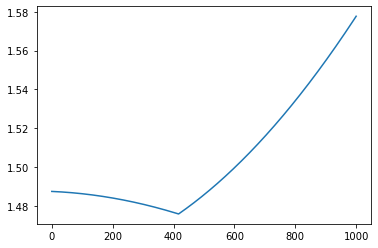

In [6]:
plt.plot(o_list)
plt.show()

In [7]:
# Problema del hiper-rectangulo:
# Vector A = <a1,a2,a3,a4,a5,a6>, ai en los naturales y todos distintos entre si
# Vector X = <x1,x2,x3,x4,x5,x6> con cada xi en U[-ai,ai]
# M = 4 (4 unidades de salida)
# N = 6 (6 unidades de entrada por definicion del problema)
np.random.seed(42)

A = [1,2,3,4,5,6]
X = []
for a in A:
    temp = np.random.uniform(-a,a)
    X.append(temp)

In [8]:
# Uso primero la regla de Sanger
X = np.array(X).reshape(1,6)
X = (X - X.mean() ) / X.var()
W = np.random.normal(0, 0.1, (6,4) )

Y = np.dot(X,W)

D = np.triu(np.ones((4,4)))

Z = np.dot(W, Y.T*D)

dW = (X.T - Z)*Y

W = W + 0.01*dW

o2 = np.sum(np.abs( np.dot( W.T, W) - np.identity(4) ))/2
o2_list = [o2]

In [9]:
for i in range(1000):
    W = W + 0.001*dW

    Z = np.dot(W, Y.T*D)

    dW = (X.T - Z)*Y

    o_temp = np.sum(np.abs( np.dot( W.T, W) - np.identity(4) ))/2
    o2_list.append(o_temp)

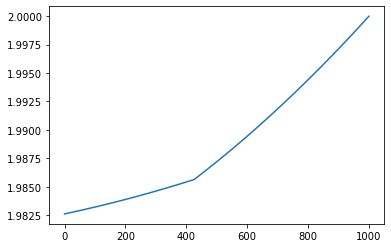

In [10]:
plt.plot(o2_list)
plt.show()

In [11]:
# Ahora para la regla de Oja:

Ws = np.random.normal(0, 0.1, (6,4) )

Ys = np.dot(X,Ws)

Zs = np.dot(Ys,Ws.T)

dWs = np.outer(X-Zs,Ys)

os = np.sum(np.abs( np.dot( Ws.T, Ws) - np.identity(4) ))/2

os_list = [os]

In [12]:
for i in range(100):
    Ws = Ws + 0.1*dWs

    Zs = np.dot(Ys,Ws.T)

    dWs = np.outer(X-Zs,Ys)

    os_temp = np.sum(np.abs( np.dot( Ws.T, Ws) - np.identity(4) ))/2
    os_list.append(os_temp)

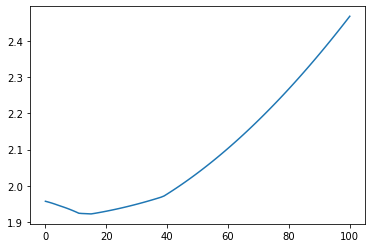

In [13]:
plt.plot(os_list)
plt.show()